f(x,y) = (1.5 – x -xy)^2 + (2.25 – x + xy^2)^2 + (2.625 – x + xy^3)^2 for x,y in range <-4.5, 4.5>


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [27]:
from sys import maxsize


def f(x):
    """for x,y in range <-4.5,4.5>"""
    

    #     return np.float64(maxsize)

    # # else:
    return (1.5 - x[0] - x[0] * x[1])**2 + (2.25 - x[0] + x[0] * x[1]**2)**2 + (2.625 - x[0] + x[0] * x[1]**3)**2



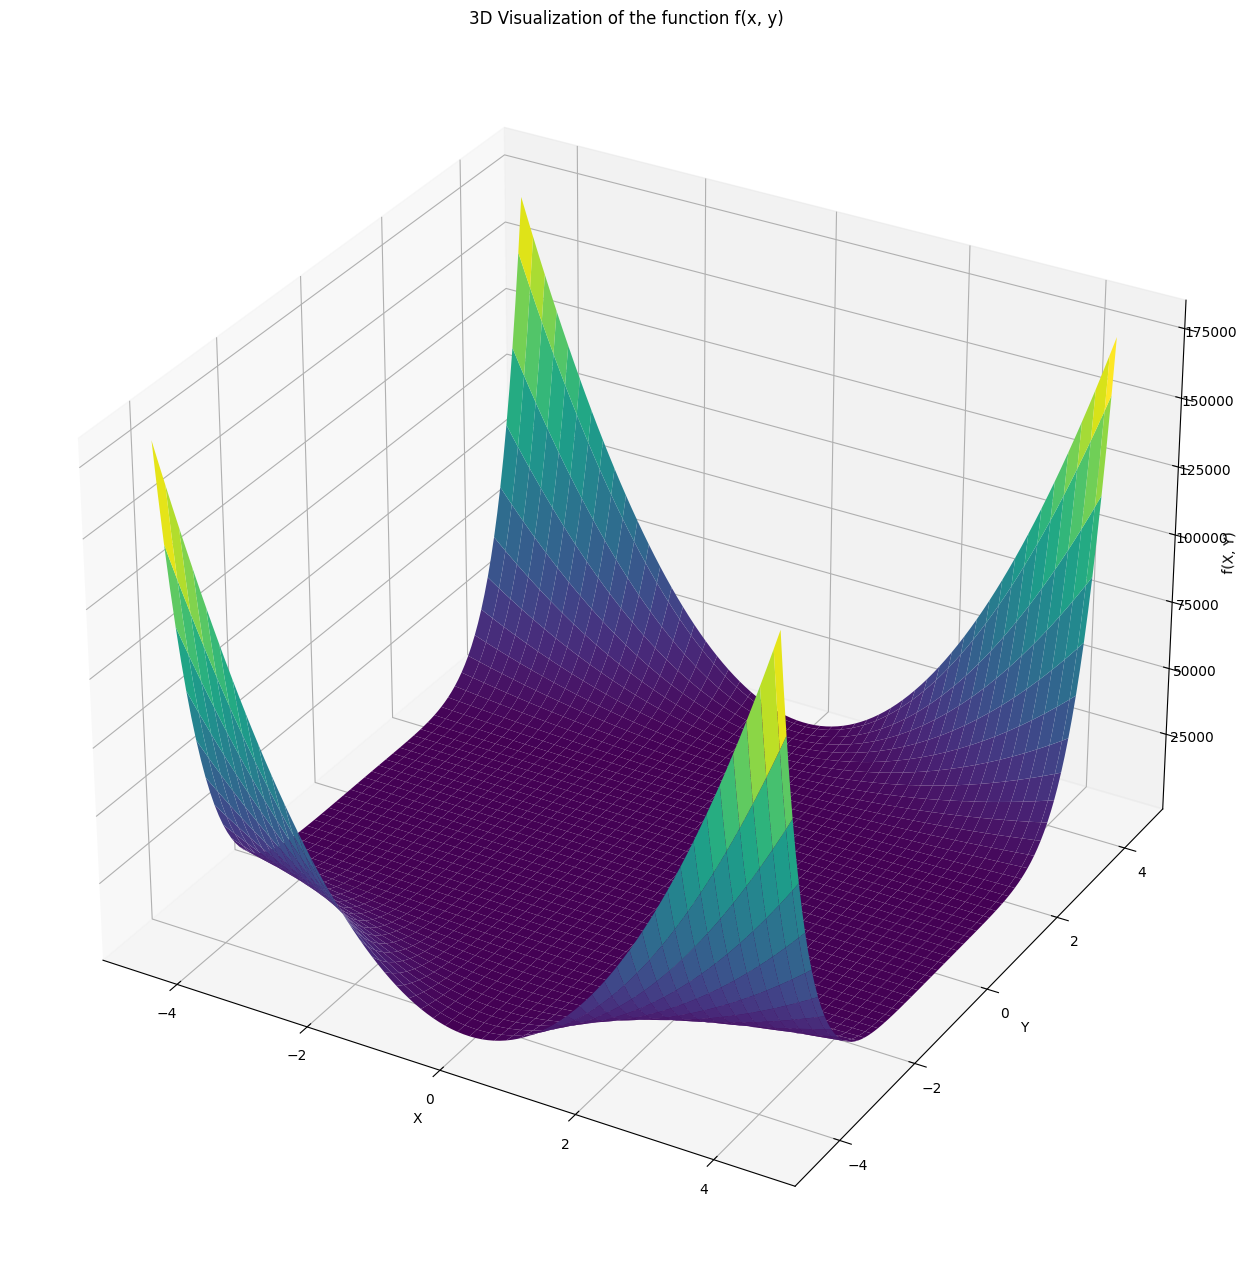

In [28]:
# Define the range for x and y values
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)

Z = f((X,Y))
# Plotting the 3D surface
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Visualization of the function f(x, y)')

plt.show()

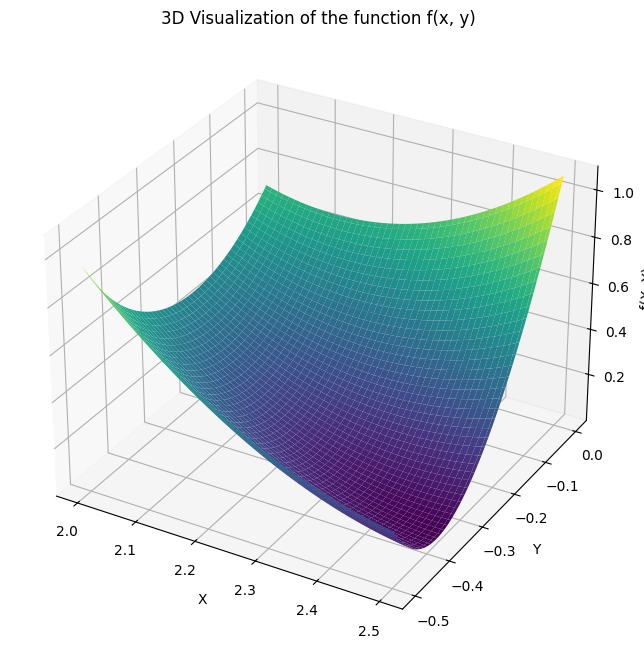

In [29]:
# Define the range for x and y values
x = np.linspace(2, 2.5, 100)
y = np.linspace(-0.5, 0, 100)
X, Y = np.meshgrid(x, y)

Z = f((X,Y))

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Visualization of the function f(x, y)')

plt.show()

Value of the function explodes especially on the ends of range <-4.5,4.5>

In [30]:
particles = 200
dim = 2
c = 2.05  # as in original paper
steps =200
up_domain = 4.5              # representation of function domain
low_domain = -4.5

c1 = 2.05 
c2 = 2.05 

Pack to function 

In [ ]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer(function = f , particles = 50 , steps = 20 , c = 2.05 , chi = 0.72984, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))                    # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = chi*(v + c * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c * epsilon[j][1] * (P[p_g][j] - X[(i,j)]))  # I'm just impressed how this chi stabilize this algo
        X = X + V    
        
        # additional if to make sure that we don't assign to minimum point from outside of search space, with this implementation the most simple way to do that is in function
        
       
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        # p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # if x in X is out of the domain than set which_lower to 1 
        
        for i in range(len(X)):
            if ((X[i][0]<low_domain)|(X[i][0]>up_domain) | (X[i][1]<low_domain)|(X[i][1]>up_domain)):
                which_lower[i] = 1
        
        
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        # now calcualte global minimum
        global_mn = np.apply_along_axis(function,axis=1,arr=P)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        p_g = global_mn.argmin() 
        
        print(f"Step: {_} global best value: {P_I.min()} , this step min: {F_P.min()} ")
    
    # return arguments, min 
    return  P[p_g] , P_I.min()
    

In [32]:
pso_optimizer(function=f,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)

Step: 0 global best value: 0.8131258175722216 , this step min: 2.378306447028217 
Step: 1 global best value: 0.12455567097263714 , this step min: 0.12455567097263714 
Step: 2 global best value: 0.12455567097263714 , this step min: 0.2646021302249813 
Step: 3 global best value: 0.04822990973379029 , this step min: 0.04822990973379029 
Step: 4 global best value: 0.04822990973379029 , this step min: 0.056390985837785325 
Step: 5 global best value: 0.04822990973379029 , this step min: 0.9633276152118596 
Step: 6 global best value: 0.04822990973379029 , this step min: 0.6427775390041834 
Step: 7 global best value: 0.04822990973379029 , this step min: 0.06299290660124283 
Step: 8 global best value: 0.04822990973379029 , this step min: 0.2670988177482989 
Step: 9 global best value: 0.04822990973379029 , this step min: 0.4274012889506719 
Step: 10 global best value: 0.02485012123463827 , this step min: 0.02485012123463827 
Step: 11 global best value: 0.02485012123463827 , this step min: 0.5636

(array([ 2.51799046, -0.37462981]), 0.01351449494595812)

Verification against a simple example 

In [33]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer_2(function = f , particles = 50 , steps = 20 , c1 = 2.25  ,c2= 2.5 , w = 0.7, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))                    # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = w* v + c1 * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c2 * epsilon[j][1] * (P[p_g][j] - X[(i,j)])  # I'm just impressed how this chi stabilize this algo
        X = X + V    
        
        # additional if to make sure that we don't assign to minimum point from outside of search space, with this implementation the most simple way to do that is in function
        
       
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        # p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # if x in X is out of the domain than set which_lower to 1 
        
        for i in range(len(X)):
            if ((X[i][0]<low_domain)|(X[i][1]>up_domain)):
                which_lower[i] = 1
        
        
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        # now calcualte global minimum
        global_mn = np.apply_along_axis(function,axis=1,arr=P)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        p_g = global_mn.argmin() 
        
        print(f"Step: {_} global best value: {P_I.min()} , this step min: {F_P.min()} ")
    
    # return arguments, min 
    return  P[p_g] , P_I.min()

In [34]:
pso_optimizer_2(function=f,particles=particles,steps=steps,c1 = 2 , c2 = 2.5,low_domain=low_domain,up_domain=up_domain,dim=dim)

Step: 0 global best value: 0.6766696596673196 , this step min: 0.8902350294508156 
Step: 1 global best value: 0.6766696596673196 , this step min: 0.7429885366673212 
Step: 2 global best value: 0.27224707125896497 , this step min: 0.27224707125896497 
Step: 3 global best value: 0.2296739734325866 , this step min: 0.2296739734325866 
Step: 4 global best value: 0.13261068066040363 , this step min: 0.13261068066040363 
Step: 5 global best value: 0.03648384906217145 , this step min: 0.03648384906217145 
Step: 6 global best value: 0.028602818009852364 , this step min: 0.028602818009852364 
Step: 7 global best value: 0.028602818009852364 , this step min: 0.029056833412812406 
Step: 8 global best value: 0.028602818009852364 , this step min: 0.045875790187223056 
Step: 9 global best value: 0.028602818009852364 , this step min: 0.06757520429935027 
Step: 10 global best value: 0.014735222434558229 , this step min: 0.014735222434558229 
Step: 11 global best value: 0.014735222434558229 , this step 

(array([ 2.51791716, -0.37454488]), 0.013514564707257239)

In [35]:
def f_test(x):
    """for x,y in range <-2,2>"""
    return x[0]**2 + x[1]**2
low_domain = -2
up_domain = 2


In [36]:
pso_optimizer(function=f_test,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)

Step: 0 global best value: 0.001836569823885175 , this step min: 0.002768296083832998 
Step: 1 global best value: 0.001836569823885175 , this step min: 0.01780004390989734 
Step: 2 global best value: 0.001836569823885175 , this step min: 0.006323119742841285 
Step: 3 global best value: 0.001836569823885175 , this step min: 0.0024219990439958766 
Step: 4 global best value: 0.001836569823885175 , this step min: 0.0036927462854604936 
Step: 5 global best value: 0.000484125527073391 , this step min: 0.000484125527073391 
Step: 6 global best value: 0.0003514130208317915 , this step min: 0.0003514130208317915 
Step: 7 global best value: 0.0003514130208317915 , this step min: 0.0034121233463115987 
Step: 8 global best value: 0.0003514130208317915 , this step min: 0.0007150424845271628 
Step: 9 global best value: 0.0003514130208317915 , this step min: 0.0005257913453834002 
Step: 10 global best value: 0.0003514130208317915 , this step min: 0.003217575048393273 
Step: 11 global best value: 1.65

(array([8.11453524e-11, 3.33095931e-12]), 6.595663504809025e-21)

In [40]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer_withoutconstiction(function = f , particles = 50 , steps = 20 , c = 2.05 , chi = 0.72984, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))                    # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = v + c * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c * epsilon[j][1] * (P[p_g][j] - X[(i,j)])  # I'm just impressed how this chi stabilize this algo, here example of lacking this
            # here according to papers I have a small mistake because without this constant I should cap V to some level and I ommit this on puprose
        X = X + V    
                
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # update table of arguments 
        # if x in X is out of the domain than set which_lower to 1 
        
        for i in range(len(X)):
            if ((X[i][0]<low_domain)|(X[i][1]>up_domain)):
                which_lower[i] = 1
        
        
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        # now calcualte global minimum
        global_mn = np.apply_along_axis(function,axis=1,arr=P)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        p_g = global_mn.argmin() 
        
        print(f"Step: {_} global best value: {P_I.min()} , this step min: {F_P.min()}, minimum assigned {P_I.min()}")
    # return arguments, min 
    return  P[p_g] , P_I.min()

In [41]:
pso_optimizer_withoutconstiction(function=f,particles=particles,steps=300,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)  # it found minimum but it's not stable

Step: 0 global best value: 0.2184674481274873 , this step min: 0.2184674481274873, minimum assigned 0.2184674481274873
Step: 1 global best value: 0.2184674481274873 , this step min: 4.3460918300531866, minimum assigned 0.2184674481274873
Step: 2 global best value: 0.13567468615501796 , this step min: 0.13567468615501796, minimum assigned 0.13567468615501796
Step: 3 global best value: 0.13567468615501796 , this step min: 0.2264625776169997, minimum assigned 0.13567468615501796
Step: 4 global best value: 0.13567468615501796 , this step min: 0.2073753171437378, minimum assigned 0.13567468615501796
Step: 5 global best value: 0.13567468615501796 , this step min: 1.2821616973011323, minimum assigned 0.13567468615501796
Step: 6 global best value: 0.13567468615501796 , this step min: 0.21627045282601248, minimum assigned 0.13567468615501796
Step: 7 global best value: 0.13567468615501796 , this step min: 1.6709104225933191, minimum assigned 0.13567468615501796
Step: 8 global best value: 0.13567

(array([ 2.48189851, -0.37997192]), 0.017543028932746386)